# EchoSMS demonstration for WGFAST 2025 presentation

This Jupyter notebook provides a brief demonstration of the echoSMs Python package and how it can be used to 
calculate the target strength of various objects.


In [17]:
!pip install echosms
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [18]:
import echosms

from importlib.metadata import version
version('echosms')

'0.9.1'

## Reference models and benchmark data

EchoSMs contains the model parameters and benchmark results from the Jech et al. (2015) paper. These are a useful set of models definitions and TS values to test other model code against. There are also some other useful model definitions, such as calibration spheres.

In [19]:
ref = echosms.ReferenceModels()
ref.names()

['fixed rigid sphere',
 'pressure release sphere',
 'gas filled sphere',
 'weakly scattering sphere',
 'spherical fluid shell with pressure release interior',
 'spherical fluid shell with gas interior',
 'spherical fluid shell with weakly scattering interior',
 'fixed rigid prolate spheroid',
 'pressure release prolate spheroid',
 'gas filled prolate spheroid',
 'weakly scattering prolate spheroid',
 'fixed rigid finite cylinder',
 'pressure release finite cylinder',
 'gas filled finite cylinder',
 'weakly scattering finite cylinder',
 'WC20 calibration sphere',
 'WC21 calibration sphere',
 'WC22 calibration sphere',
 'WC25 calibration sphere',
 'WC38.1 calibration sphere',
 'WC57.2 calibration sphere',
 'WC60 calibration sphere',
 'WC64 calibration sphere',
 'Cu10.3 calibration sphere',
 'Cu13.7 calibration sphere',
 'Cu23 calibration sphere',
 'Cu32 calibration sphere',
 'Cu32.1 calibration sphere',
 'Cu42 calibration sphere',
 'Cu45 calibration sphere',
 'Cu60 calibration sphere',
 

In [20]:
ref.specification('weakly scattering sphere')

{'name': 'weakly scattering sphere',
 'shape': 'sphere',
 'boundary_type': 'fluid filled',
 'description': 'A sphere with a fluid-filled interior with similar density and sound speed to the surrounding medium',
 'a': 0.01,
 'medium_rho': 1026.8,
 'medium_c': 1477.3,
 'target_rho': 1028.9,
 'target_c': 1480.3,
 'source': 'https://doi.org/10.1121/1.4937607',
 'benchmark_model': 'mss'}

## Shapes from the literature

EchoSMs also contains other fish model data - with the aim of easing access to historical datasets easier and facilitating testing of new model implementations.

In [21]:
echosms.KRMdata().names()

['Sardine',
 'Cod',
 'Bocaccio',
 'LargemouthBass_620',
 'LargemouthBass_620_Lateral',
 'LargemouthBass_627',
 'LargemouthBass_627_Lateral',
 'StripedBass_205',
 'StripedBass_205_Lateral',
 'StripedBass_628',
 'StripedBass_628_Lateral',
 'ChannelCatfish_1086',
 'ChannelCatfish_1086_Lateral',
 'WhiteCatfish_185',
 'WhiteCatfish_185_Lateral',
 'BlackCrappie_236',
 'BlackCrappie_236_Lateral',
 'Sandfish_200_Female',
 'Sandfish_175_Male',
 'Corvina_20140317_001_Broadside',
 'Corvina_20140317_008_Broadside',
 'Corvina_20140331_003_Broadside',
 'Corvina_20140331_005_Broadside',
 'Corvina_20140331_008_Broadside',
 'AtlanticMackerel_26.94cm',
 'AtlanticMackerel_backbone_26.94cm',
 'AtlanticMackerel_backboneSkull_26.94cm',
 'AtlanticMackerel_19.52cm',
 'AtlanticMackerel_backbone_19.52cm',
 'AtlanticMackerel_backboneSkull_19.52cm',
 'SkipjackTuna_46.54cm',
 'SkipjackTuna_backbone_46.54cm',
 'SkipjackTuna_backboneSkull_46.54cm',
 'SkipjackTuna_41.18cm',
 'SkipjackTuna_backbone_41.18cm',
 'Skipjac

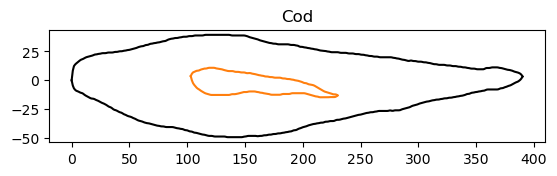

In [22]:
echosms.KRMdata().model('Cod').plot()

In [23]:
echosms.DWBAdata().names()

['Daphnia',
 'Daphnia2',
 'Generic acartia',
 'Generic krill (Conti 2006)',
 'Generic krill (McGehee 1998)',
 'Nauplius',
 'Sandeel']

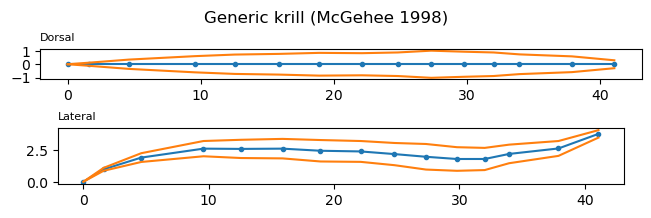

In [24]:
echosms.DWBAdata().model('Generic krill (McGehee 1998)').plot()

## Running models

In [25]:
parameters = echosms.ReferenceModels().parameters('weakly scattering sphere')
parameters['f'] = 38000
parameters

{'boundary_type': 'fluid filled',
 'a': 0.01,
 'medium_rho': 1026.8,
 'medium_c': 1477.3,
 'target_rho': 1028.9,
 'target_c': 1480.3,
 'f': 38000}

In [26]:
model = echosms.MSSModel()
model.calculate_ts(parameters)

[-94.13445487634165]

mss: 100%|██████████████████████████████████████████████████████████████████████████████████ [798/798; 180.69 models/s]


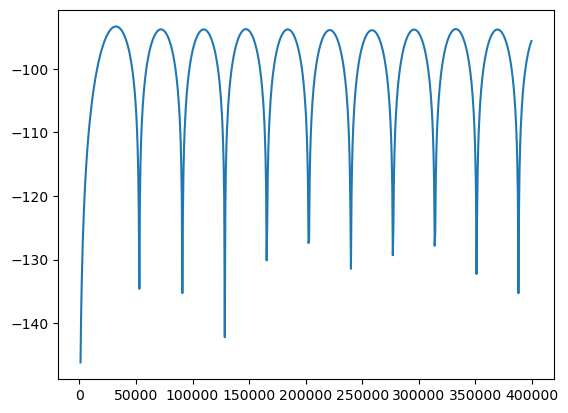

In [27]:
parameters['f'] = range(1000, 400000, 500)
ts = model.calculate_ts(parameters, progress=True)
plt.plot(parameters['f'], ts)

How does that compare to the Jech et al. benchmarks values?

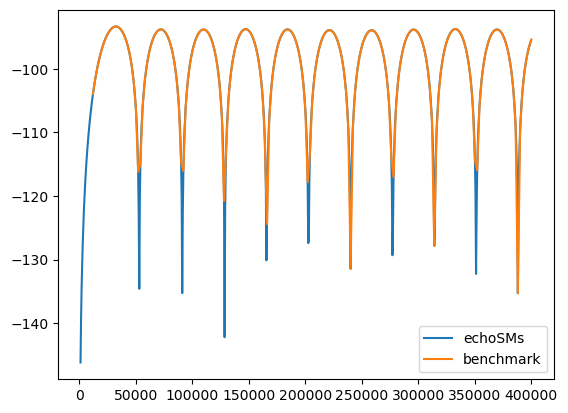

In [28]:
bm_f, bm_ts = echosms.BenchmarkData().freq_data('weakly scattering sphere')
plt.plot(parameters['f'], ts, bm_f, bm_ts)
plt.legend(['echoSMs', 'benchmark'])

In [29]:
parameters['a'] = np.linspace(0.001, 0.025, 100)
parameters['f'] = np.linspace(10, 200, 100)*1e3
parameters

{'boundary_type': 'fluid filled',
 'a': array([0.001     , 0.00124242, 0.00148485, 0.00172727, 0.0019697 ,
        0.00221212, 0.00245455, 0.00269697, 0.00293939, 0.00318182,
        0.00342424, 0.00366667, 0.00390909, 0.00415152, 0.00439394,
        0.00463636, 0.00487879, 0.00512121, 0.00536364, 0.00560606,
        0.00584848, 0.00609091, 0.00633333, 0.00657576, 0.00681818,
        0.00706061, 0.00730303, 0.00754545, 0.00778788, 0.0080303 ,
        0.00827273, 0.00851515, 0.00875758, 0.009     , 0.00924242,
        0.00948485, 0.00972727, 0.0099697 , 0.01021212, 0.01045455,
        0.01069697, 0.01093939, 0.01118182, 0.01142424, 0.01166667,
        0.01190909, 0.01215152, 0.01239394, 0.01263636, 0.01287879,
        0.01312121, 0.01336364, 0.01360606, 0.01384848, 0.01409091,
        0.01433333, 0.01457576, 0.01481818, 0.01506061, 0.01530303,
        0.01554545, 0.01578788, 0.0160303 , 0.01627273, 0.01651515,
        0.01675758, 0.017     , 0.01724242, 0.01748485, 0.01772727,
        0

In [30]:
data = echosms.as_dataarray(parameters)
model.calculate_ts(data, progress=True, multiprocess=True, expand=True)

  0%|                                                                                          | 0/100 [00:00<…

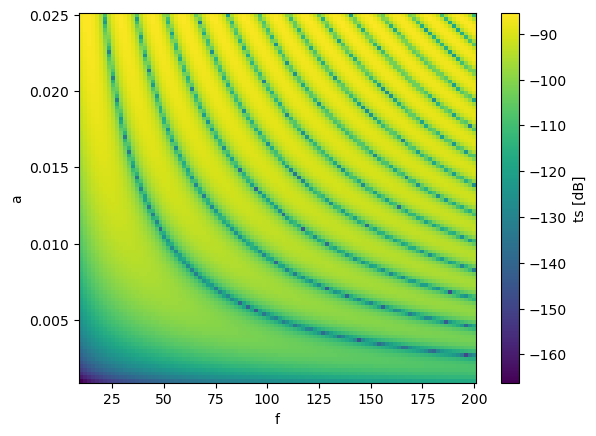

In [31]:
data['f'] = data.f/1e3  # Hz to kHz
xr.plot.pcolormesh(data.squeeze(drop=True))

## Summary
EchoSMs offers:
- Easy access to reference models and benchmark results
- 9+ scattering models
- Simple and consistent interface